# Here is your task 1


1 Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

2 Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

3 Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

4 Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

5 For a challenge – what insights can you draw from the location information provided in the dataset?

6 Put together 2-3 slides summarising your most interesting findings to ANZ management.

# IMPORTING LIBRARIES AND DATASETS

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [117]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# PRIMARY EDA

In [118]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [119]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [121]:
df.shape

(12043, 23)

# CHECKING FOR NULL VALUES

In [122]:
total_null = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['total_nul'])
percentage_null = pd.DataFrame(round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['percentage_null'])
pd.concat([total_null, percentage_null], axis = 1)

,total_nul,percentage_null
merchant_code,11160,92.67
bpay_biller_code,11158,92.65
card_present_flag,4326,35.92
merchant_state,4326,35.92
merchant_suburb,4326,35.92
merchant_id,4326,35.92
merchant_long_lat,4326,35.92
movement,0,0.00
first_name,0,0.00
account,0,0.00


In [123]:
import seaborn as sns
%matplotlib inline

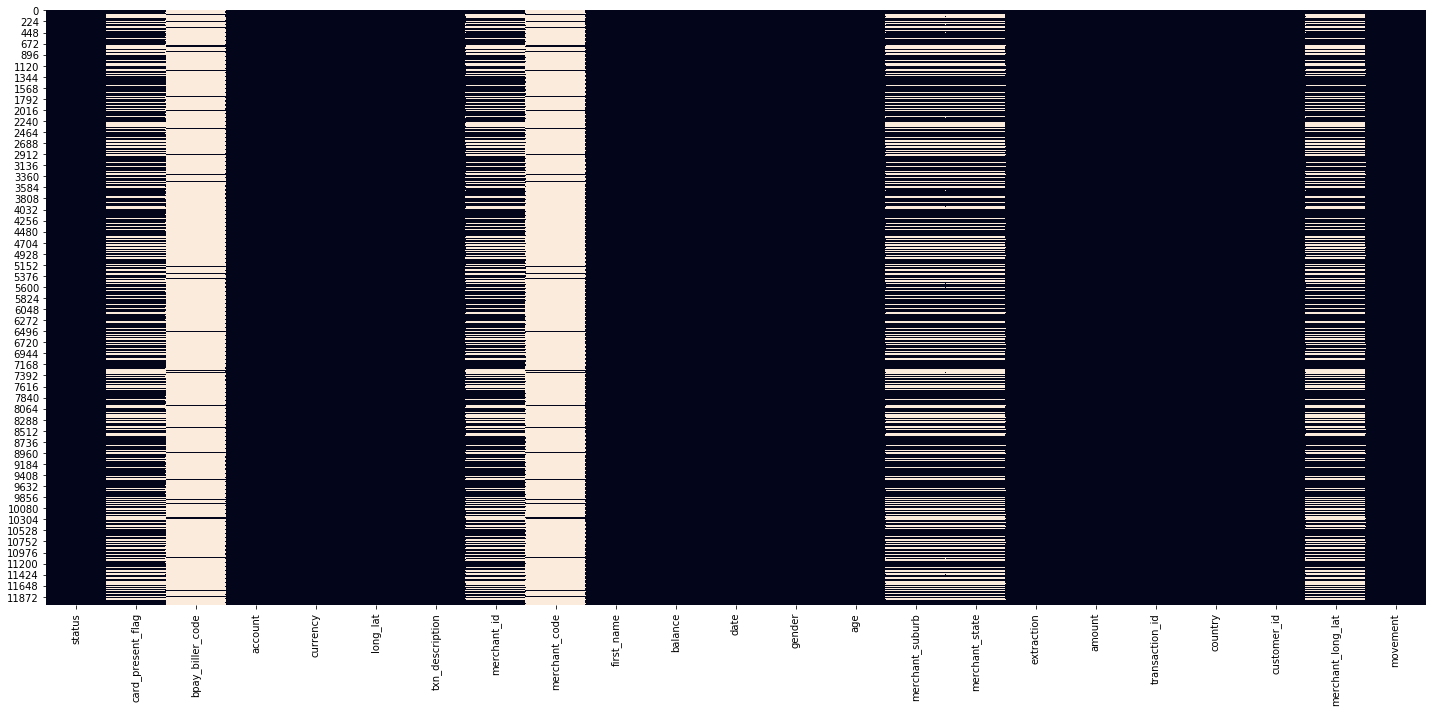

In [124]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cbar=False)
plt.tight_layout()
plt.show()

# CHECKING FOR UNIQUE ACCOUNT HOLDERS

In [125]:
df["account"].nunique()

100

# COVERTING INTO DESIRABLE DATETIME FORMAT

In [126]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# CHECKING FOR OUTLIERS

In [127]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
90%,1.000000,0.0,29442.384000,43.000000,186.000000
95%,1.000000,0.0,53362.930000,46.000000,1158.150000
99%,1.000000,0.0,201963.445200,69.000000,3195.010000


# CHECKING FOR NUMBER OF TRANSACTION PER CUSTOMER

In [215]:
trans_per_cust=df["customer_id"].value_counts().head(10)
trans_per_cust

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
CUS-1196156254    245
CUS-2695611575    239
CUS-51506836      239
CUS-860700529     233
CUS-1669695324    230
Name: customer_id, dtype: int64

(array([7., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([230. , 264.8, 299.6, 334.4, 369.2, 404. , 438.8, 473.6, 508.4,
        543.2, 578. ]),
 <a list of 10 Patch objects>)

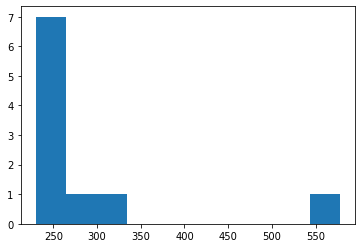

In [216]:
plt.hist(trans_per_cust)

# CHECKING FOR NUMBER OF TRANSACTION IN A DAY

In [191]:
trans_day=df["date"].value_counts().head(10)
trans_day

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
2018-09-21    160
2018-10-03    160
2018-10-04    159
2018-09-27    159
2018-10-19    158
Name: date, dtype: int64

(array([145., 150., 155., 160., 165., 170., 175., 180., 185., 190.]),
 <a list of 10 Text xticklabel objects>)

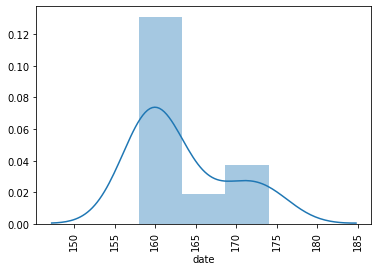

In [195]:
sns.distplot(df["date"].value_counts().head(10))
plt.xticks(rotation=90)

# CHECKING THE AGE GROUP OF CUST

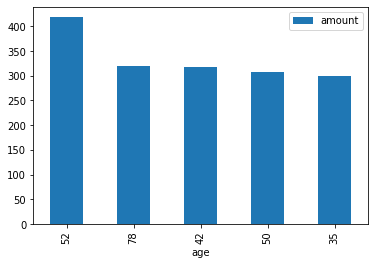

In [178]:
df1 = pd.DataFrame(df.groupby(['age'])['amount'].mean().sort_values(ascending = False).head())
df1.plot.bar()

In [131]:
# highest amount is spent by age group of 52

# CHECKING FOR TRANSATION VOLUME FOR EACH DAY

In [132]:
df_date_count = df.groupby("date").count()

In [133]:
trans_vol = df_date_count["customer_id"].mean()
n_points = len(df_date_count.index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 <a list of 91 Text xticklabel objects>)

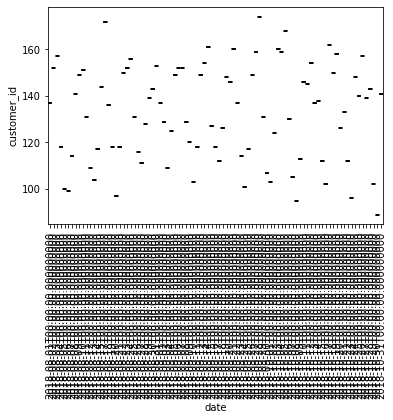

In [135]:
sns.boxplot(x=df_date_count.index, y=df_date_count["customer_id"], palette=("cubehelix"))
plt.xticks(rotation=90)

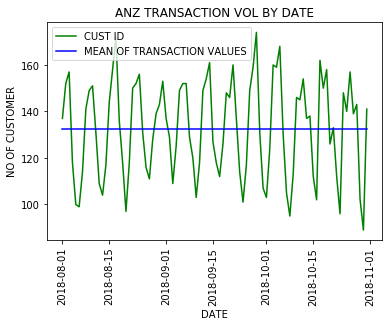

In [136]:
plt.figure()
plt.plot(df_date_count.index, df_date_count["customer_id"], c="green", label = "CUST ID")
plt.plot(df_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="b", label = "MEAN OF TRANSACTION VALUES")
plt.title("ANZ TRANSACTION VOL BY DATE")
plt.xlabel("DATE")
plt.ylabel("NO OF CUSTOMER")
plt.xticks(rotation=90)
plt.legend()

# CHECKING FOR MEAN TRANSACTION AMT FOR EACH DAY

In [137]:
df_mean_date = df.groupby("date").mean()

In [138]:
trans_amt = df_mean_date["amount"].mean()
n_points = len(df_date_count.index)

(array([736907., 736921., 736938., 736952., 736968., 736982., 736999.]),
 <a list of 7 Text xticklabel objects>)

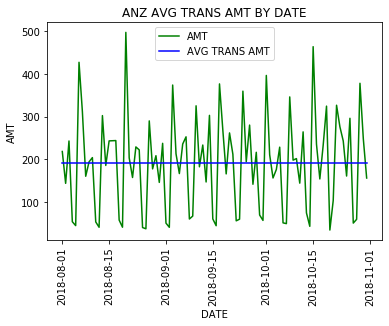

In [139]:
plt.figure()
plt.plot(df_date_count.index, df_mean_date["amount"], c="green", label = "AMT")
plt.plot(df_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="b", label = "AVG TRANS AMT")
plt.title("ANZ AVG TRANS AMT BY DATE")
plt.xlabel("DATE")
plt.ylabel("AMT")
plt.legend()
plt.xticks(rotation=90)


In [140]:
# NO OF TRANSACTION VS SALARY

In [141]:
txn_count=df["txn_description"].value_counts()   
txn_count

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

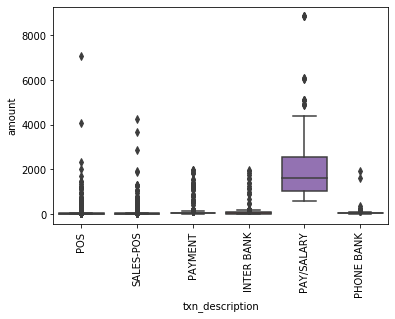

In [142]:
sns.boxplot(x=df.txn_description, y=df.amount)
plt.xticks(rotation=90)

In [143]:
salary_transact = df[df['txn_description']=='PAY/SALARY']
sal_male=salary_transact[salary_transact['gender']=='M']
sal_female=salary_transact[salary_transact['gender']=='F']

In [144]:
avg_sal_male=sal_male['amount'].values.mean()
avg_sal_male

2096.811681034483

In [145]:
avg_sal_female=sal_female['amount'].values.mean()
avg_sal_female

1679.370477326969

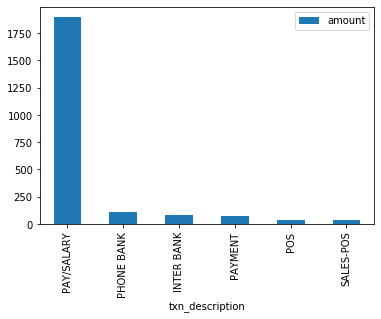

In [146]:
df3 = pd.DataFrame(df.groupby(['txn_description'])['amount'].mean().sort_values(ascending = False))
df3.plot.bar()

# TOP 5 CUSTOMERS

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

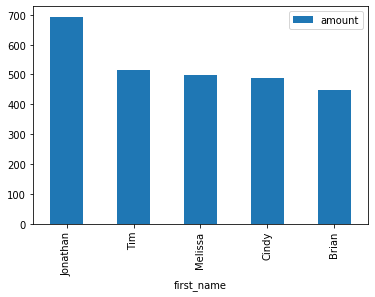

In [176]:
df4 = pd.DataFrame(df.groupby(['first_name'])['amount'].mean().sort_values(ascending = False).head())
plt.figure(figsize=(20,20))
df4.plot.bar()
plt.xticks(rotation=90)

In [173]:
x=df.first_name.value_counts()
x.head()

Michael    746
Diana      578
Jessica    408
Joseph     391
Jeffrey    388
Name: first_name, dtype: int64

# DVISION OF CUSTOMERS BASED ON PAYMENT AND GENDER

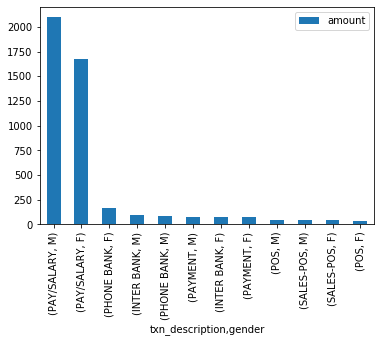

In [180]:
df5 = pd.DataFrame(df.groupby(['txn_description','gender'])['amount'].mean().sort_values(ascending = False))
df5.plot.bar()

# IT IS SEEN THAT MALES WITH PAY/SAL SPEND THE HIGHEST

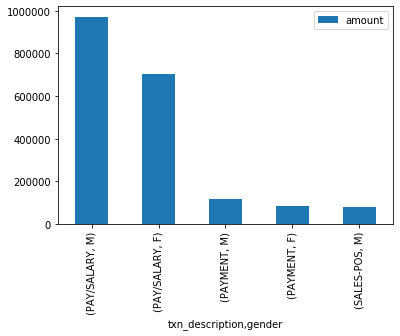

In [181]:
df5 = pd.DataFrame(df.groupby(['txn_description','gender'])['amount'].sum().sort_values(ascending = False).head())
df5.plot.bar()

In [220]:
pd.crosstab(index=df['txn_description'],
            columns=df['gender'],
            dropna=True)

gender,F,M
txn_description,,
INTER BANK,344,398
PAY/SALARY,419,464
PAYMENT,1107,1493
PHONE BANK,26,75
POS,1921,1862
SALES-POS,1941,1993


In [185]:
pd.DataFrame(df.groupby(['txn_description','gender'])['amount'].sum().sort_values(ascending = False))

amount
txn_description gender           
PAY/SALARY      M       972920.62
                F       703656.23
PAYMENT         M       116761.00
                F        85033.00
SALES-POS       M        80183.97
POS             M        78734.98
SALES-POS       F        76821.14
POS             F        74126.26
INTER BANK      M        37882.00
                F        26449.00
PHONE BANK      M         6479.00
                F         4237.00

# AMT VS MONTH

In [147]:
months = []
for date in df["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

In [148]:
df["Months"] = months
df["Months"].head()

0    August
1    August
2    August
3    August
4    August
Name: Months, dtype: object

# AVG CUST BALANCE BY AMT WRT AGE

In [149]:
#AUGUST-BALANCE

In [150]:
df_aug_cust = df[df["Months"] == "August"].groupby("customer_id").mean()
df_aug_gen = df[df["Months"] == "August"].groupby("gender").mean()

In [151]:
avg_female_bal_aug = df_aug_gen["balance"].iloc[0]
avg_male_bal_aug = df_aug_gen["balance"].iloc[1]
n_points = len(df_aug_cust["age"])

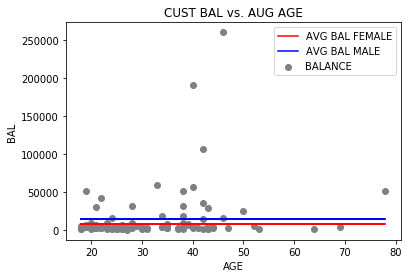

In [152]:
plt.figure()
plt.scatter(df_aug_cust["age"], df_aug_cust["balance"], c="grey", label="BALANCE")
plt.plot(df_aug_cust["age"], np.linspace(avg_female_bal_aug,avg_female_bal_aug,n_points), c="r", label = "AVG BAL FEMALE")
plt.plot(df_aug_cust["age"], np.linspace(avg_male_bal_aug,avg_male_bal_aug,n_points), c="b", label = "AVG BAL MALE")
plt.title("CUST BAL vs. AUG AGE")
plt.xlabel("AGE")
plt.ylabel("BAL")
plt.legend()

In [153]:
#AUG_AMOUNT

In [154]:
avg_female_amt_aug = df_aug_gen["amount"].iloc[0]
avg_male_amt_aug = df_aug_gen["amount"].iloc[1]

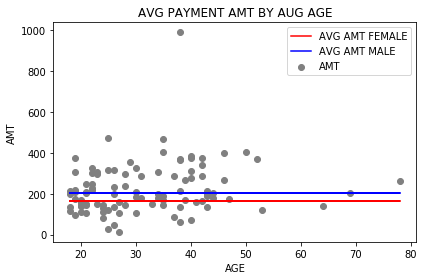

In [155]:
plt.scatter(df_aug_cust["age"], df_aug_cust["amount"], c="grey", label="AMT")
plt.plot(df_aug_cust["age"], np.linspace(avg_female_amt_aug ,avg_female_amt_aug ,n_points), c="r", label = "AVG AMT FEMALE")
plt.plot(df_aug_cust["age"], np.linspace(avg_male_amt_aug,avg_male_amt_aug,n_points), c="b", label = "AVG AMT MALE")
plt.title("AVG PAYMENT AMT BY AUG AGE")
plt.xlabel("AGE")
plt.ylabel("AMT")
plt.legend()
plt.tight_layout()

In [156]:
#SEPT_BALANCE

In [157]:
df_sept_cust = df[df["Months"] == "September"].groupby("customer_id").mean()
df_sept_gen = df[df["Months"] == "September"].groupby("gender").mean()

In [158]:
avg_female_bal_sept = df_sept_gen["balance"].iloc[0]
avg_male_bal_sept = df_sept_gen["balance"].iloc[1]
n_points = len(df_sept_cust["age"])

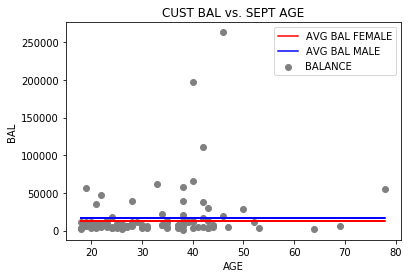

In [159]:
plt.figure()
plt.scatter(df_sept_cust["age"], df_sept_cust["balance"], c="grey", label="BALANCE")
plt.plot(df_sept_cust["age"], np.linspace(avg_female_bal_sept,avg_female_bal_sept,n_points), c="r", label = "AVG BAL FEMALE")
plt.plot(df_sept_cust["age"], np.linspace(avg_male_bal_sept,avg_male_bal_sept,n_points), c="b", label = "AVG BAL MALE")
plt.title("CUST BAL vs. SEPT AGE")
plt.xlabel("AGE")
plt.ylabel("BAL")
plt.legend()

In [160]:
#SEPT_AMT

In [161]:
avg_female_amt_sept = df_sept_gen["amount"].iloc[0]
avg_male_amt_sept = df_sept_gen["amount"].iloc[1]

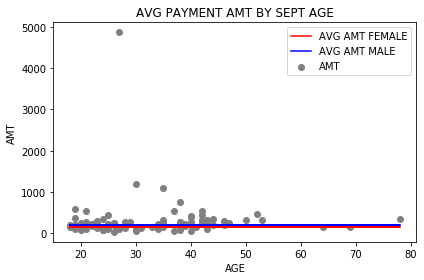

In [162]:
plt.scatter(df_sept_cust["age"], df_sept_cust["amount"], c="grey", label="AMT")
plt.plot(df_sept_cust["age"], np.linspace(avg_female_amt_sept ,avg_female_amt_sept ,n_points), c="r", label = "AVG AMT FEMALE")
plt.plot(df_sept_cust["age"], np.linspace(avg_male_amt_sept,avg_male_amt_sept,n_points), c="b", label = "AVG AMT MALE")
plt.title("AVG PAYMENT AMT BY SEPT AGE")
plt.xlabel("AGE")
plt.ylabel("AMT")
plt.legend()
plt.tight_layout()